In [12]:
import os
import textract
import pandas as pd
import re

In [13]:
import os
import docx2txt
import shutil

search_terms = ['reflection', 'Reflection', 'reflect', 'reflected', 'REFLECTION']
src_folder = '.'  # the folder containing the docx files
dst_folder = 'reflection_projects'

txt_files_with_search_terms = []

for root, _, files in os.walk('.'):
    for file in files:
        if file.endswith('.docx'):
            file_path = os.path.join(root, file)
            try:
                text = docx2txt.process(file_path)
                if any(term in text for term in search_terms):
                    txt_files_with_search_terms.append(file_path)
                    dst_path = os.path.join(dst_folder, file)
                    shutil.copyfile(file_path, dst_path)
            except:
                print(f"Error processing file: {file_path}")

Error processing file: .\fall_2019_e\marinodaniel_3881516_59243349_Final Project Weird Lit..docx
Error processing file: .\fall_2019_e\perezmiryam_3878768_59262671_Final Lit Project.docx
Error processing file: .\fall_2019_online\charnotdavid_3879716_59266777_weird fiction final.docx
Error processing file: .\fall_2019_online\cooperdominic_3869658_59269791_Weird Fiction Final Project.docx
Error processing file: .\fall_2019_online\gostkowskijack_LATE_3878260_59275085_JGFInalProject.docx
Error processing file: .\fall_2019_online\kotrbamartina_LATE_3878152_59275859_Final Poem for Literature-2.docx
Error processing file: .\fall_2019_online\melinemelissa_3882080_59274481_final project meline.docx
Error processing file: .\fall_2019_online\ochotorenaconrad_3863144_59274757_Final Project.docx
Error processing file: .\fall_2019_online\osegueranelesa_LATE_3881196_59275697_Document12 (1).docx
Error processing file: .\fall_2019_online\schramjessica_3884060_59274517_weird fic- final project.docx
Error

In [14]:
len(txt_files_with_search_terms)

44

In [15]:
from helper_functions import getTopSentence
from helper_functions import getSubjectivity
from helper_functions import getPolarity
from helper_functions import getFinalSentimentScore

actual_text = []
subjectivity_scores = []
polarity_scores = []

for filename in txt_files_with_search_terms:
    text = docx2txt.process(filename)
    actual_text.append(text)
    subjectivity_score = getSubjectivity(text)
    subjectivity_scores.append(subjectivity_score)
    polarity_score = getPolarity(text)
    polarity_scores.append(polarity_score)

In [16]:
# Create a Pandas DataFrame
df = pd.DataFrame({'filename': txt_files_with_search_terms,
            'actual_text': actual_text,       
            'polarity_score': polarity_scores,
            'subjectivity_score': subjectivity_scores
            })

In [17]:
def replace_new_lines_and_extra_spaces(string):
    result_string = re.sub(r'\n+', ' ', string)  # replace all occurrences of one or more \n characters with a space
    result_string = re.sub(r' {2,}', ' ', string)  # replace all occurrences of two or more spaces with a single space
    return result_string

In [18]:
df['actual_text'] = df['actual_text'].apply(replace_new_lines_and_extra_spaces)

In [19]:
from helper_functions import getFinalSentimentScore

df['TextBlob_Analysis'] = df['polarity_score'].apply(getFinalSentimentScore)

In [20]:
df.head()

,filename,actual_text,polarity_score,subjectivity_score,TextBlob_Analysis
0,.\fall_2019_e\marinodaniel_3881516_59243349_Fi...,Dan Marino\n\nIntro to Lit: Weird Fiction \n\n...,0.063490,0.495673,Positive
1,.\fall_2019_e\perezmiryam_3878768_59262671_Fin...,Final Lit Project\n\nWeird Fiction “Mixtape”\n...,0.029138,0.462531,Positive
2,.\fall_2019_online\charnotdavid_3879716_592667...,David Charnot \n\nProfessor Spicer \n\nWeird F...,0.140389,0.508102,Positive
3,.\fall_2019_online\cooperdominic_3869658_59269...,2\n\n\n\n2\n\nWEIRD FICTION FINAL PROJECT\n\n\...,0.107519,0.470051,Positive
4,.\fall_2019_online\gostkowskijack_LATE_3878260...,Jack Gostkowski\n\nSpicer Weird Fiction\n\nDec...,0.086473,0.554712,Positive


In [21]:
df.TextBlob_Analysis.value_counts()

Positive    38
Negative     6
Name: TextBlob_Analysis, dtype: int64

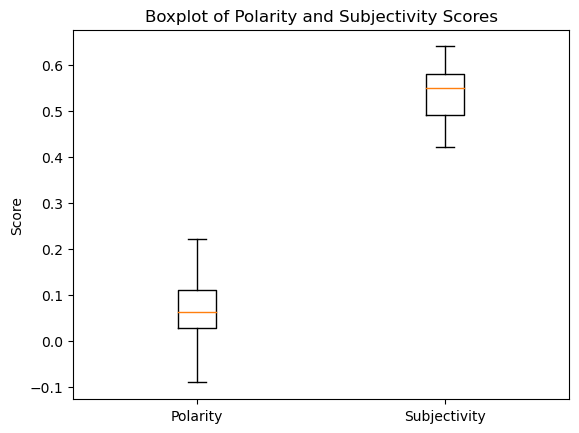

In [22]:
import matplotlib.pyplot as plt
# Create a boxplot of the polarity and subjectivity scores
plt.boxplot([df['polarity_score'], df['subjectivity_score']])
plt.xticks([1, 2], ['Polarity', 'Subjectivity'])
plt.ylabel('Score')
plt.title('Boxplot of Polarity and Subjectivity Scores')
plt.show()

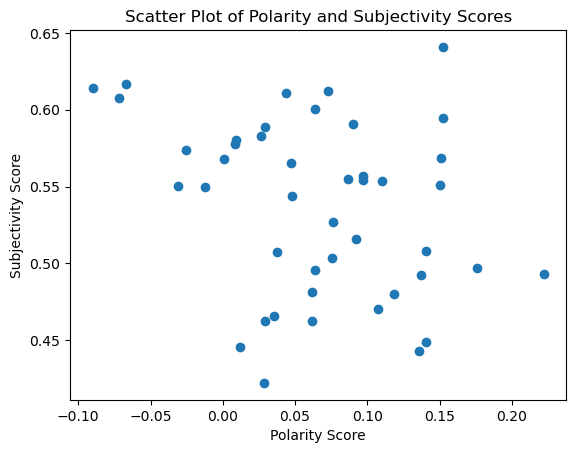

In [23]:
# Create a scatter plot of the polarity and subjectivity scores
plt.scatter(df['polarity_score'], df['subjectivity_score'])
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.title('Scatter Plot of Polarity and Subjectivity Scores')
plt.show()

In [24]:
negative_scores = df.loc[df['TextBlob_Analysis'] == "Negative"]

In [25]:
negative_scores

,filename,actual_text,polarity_score,subjectivity_score,TextBlob_Analysis
6,.\fall_2019_online\melinemelissa_3882080_59274...,Melissa Meline\n\nIntro to literature\n\nFinal...,-0.012199,0.549439,Negative
10,.\fall_2020\alexisrobbins_3893242_60351219_Rob...,Alexis Robbins\n\nDr. Spicer\n\nIntro to Lit: ...,-0.030971,0.550329,Negative
13,.\fall_2020\makaylabarefield_3892648_60351455_...,Makayla Barefield\n\nWeird Fiction\n\nSpicer\n...,-0.089922,0.614341,Negative
21,.\fall_2021\mafadeenadeen_3905040_61458009_Fin...,Nadeen Mafadee\n\nIntroduction to Literature: ...,-0.071849,0.607852,Negative
33,.\spring_2022\davilacaroline_LATE_3908376_6183...,D’Avila \n\n\n\n\n\n\n\n\n\n\n\n\n\nFinal Proj...,-0.025323,0.573939,Negative
35,.\spring_2022\millerlogan_3899426_61819733_Fin...,Logan Miller\n\nProfessor Spicer\n\nWeird Fict...,-0.066889,0.616817,Negative


In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_sentiment_with_vader(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    
    # Get the key with the maximum value
    max_key = max(sentiment_dict, key=sentiment_dict.get)
    
    # Return a dictionary with the max key and its score
    return {'sentiment': max_key, 'score': sentiment_dict[max_key]}
negative_scores['vader_score'] = negative_scores['actual_text'].apply(calculate_sentiment_with_vader)

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12640\1529334810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_scores['vader_score'] = negative_scores['actual_text'].apply(calculate_sentiment_with_vader)


In [27]:
negative_scores

,filename,actual_text,polarity_score,subjectivity_score,TextBlob_Analysis,vader_score
6,.\fall_2019_online\melinemelissa_3882080_59274...,Melissa Meline\n\nIntro to literature\n\nFinal...,-0.012199,0.549439,Negative,"{'sentiment': 'neu', 'score': 0.8}"
10,.\fall_2020\alexisrobbins_3893242_60351219_Rob...,Alexis Robbins\n\nDr. Spicer\n\nIntro to Lit: ...,-0.030971,0.550329,Negative,"{'sentiment': 'compound', 'score': 0.9312}"
13,.\fall_2020\makaylabarefield_3892648_60351455_...,Makayla Barefield\n\nWeird Fiction\n\nSpicer\n...,-0.089922,0.614341,Negative,"{'sentiment': 'compound', 'score': 0.9437}"
21,.\fall_2021\mafadeenadeen_3905040_61458009_Fin...,Nadeen Mafadee\n\nIntroduction to Literature: ...,-0.071849,0.607852,Negative,"{'sentiment': 'neu', 'score': 0.76}"
33,.\spring_2022\davilacaroline_LATE_3908376_6183...,D’Avila \n\n\n\n\n\n\n\n\n\n\n\n\n\nFinal Proj...,-0.025323,0.573939,Negative,"{'sentiment': 'neu', 'score': 0.851}"
35,.\spring_2022\millerlogan_3899426_61819733_Fin...,Logan Miller\n\nProfessor Spicer\n\nWeird Fict...,-0.066889,0.616817,Negative,"{'sentiment': 'neu', 'score': 0.773}"


In [28]:
negative_scores['vader_sentiment'] = negative_scores['vader_score'].apply(lambda x: x['sentiment'])
negative_scores['vader_score'] = negative_scores['vader_score'].apply(lambda x: x['score'])

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12640\357153856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_scores['vader_sentiment'] = negative_scores['vader_score'].apply(lambda x: x['sentiment'])
C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12640\357153856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_scores['vader_score'] = negative_scores['vader_score'].apply(lambda x: x['score'])


In [29]:
negative_scores['sentiment'] = negative_scores['vader_score'].apply(lambda score: 'pos' if score > 0 else ('neu' if score == 0 else 'neg'))
color_list = []
for sentiment in negative_scores['sentiment']:
    if sentiment == 'pos':
        color_list.append('green')
    elif sentiment == 'neu':
        color_list.append('gray')
    else:
        color_list.append('red')

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_12640\2262484067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_scores['sentiment'] = negative_scores['vader_score'].apply(lambda score: 'pos' if score > 0 else ('neu' if score == 0 else 'neg'))


In [30]:
negative_scores = negative_scores.reset_index()

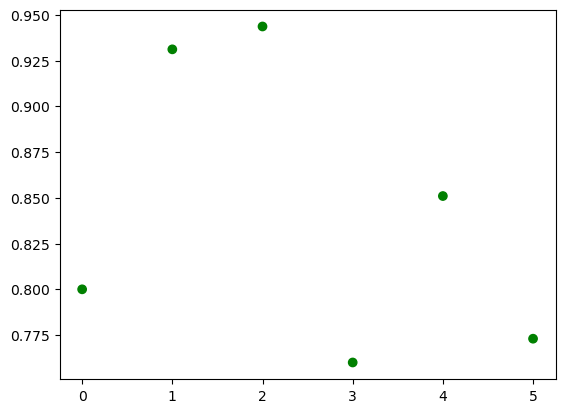

In [31]:
import matplotlib.pyplot as plt

# create a scatter plot with color coded by 'sentiment'
plt.scatter(negative_scores.index, negative_scores['vader_score'], c=color_list)
plt.show()


In [33]:
negative_scores.loc[0, 'actual_text']

"Melissa Meline\n\nIntro to literature\n\nFinal project\n\n12/12/19 \n\n\tSUMMARY: The film “Donnie Darko” follows a mentally disturbed teenager named Donnie, who is a diagnosed schizophrenic that refuses to take his medications. Because of the lack of medication, Donnie starts to have weird dreams of a bunny named Frank, who on their first encounter, tells Donnie that the world is going to end in exactly 28 days. While Donnie has these dreams, he also sleeps walk, and his first encounter actually saves his life as his sleepwalking body ended up in a golf course while a jet engine fell in what would be a sleeping Donnie’s room. Since Frank told Donnie to get out of the house, Donnie agrees to do things that Frank says even though he knows they are wrong, but feels obligated to because Frank saved his life. These things include flooding his school by busting a water pipe, as well as set fire to a local celebrity’s house which actually reveals a “kiddie porn dungeon” and gets the celebri

In [34]:
negative_scores.loc[1, 'actual_text']

'Alexis Robbins\n\nDr. Spicer\n\nIntro to Lit: Weird Fiction \n\nDecember 10, 2020 \n\nFinal Project (Self-Reflection)\n\n\tWhen I signed up for this course, Into to Lit: Weird Fiction, I was not sure what to expect as I had never heard of weird fiction before. I was not sure if it would be stories that were horror based, paranormal activity based or some other story line that provokes fear in people. But, come to find out, there is a very broad range in what is considered “weird fiction.” Some stories seemed as though they could have happened real life, while other stories were very far-fetched and had absolutely no chance of happening in real life. But there was common occurrence between all the stories; something out of the ordinary did happen. \n\n\tAn out of the ordinary occurrence could have been a multitude of events. Some stories had people come up dead at the end while other stories had made believe creatures that transformed or followed characters through the plot of the stor